<a href="https://colab.research.google.com/github/VladimirVladetic/VizualizacijaPodatakaDZ/blob/main/Vizualizacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import shutil

In [3]:
uploaded = files.upload()

source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'
kaggle_dir = '/root/.kaggle/'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
os.rename(source_path, destination_path)

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d gregorut/videogamesales

100% 381k/381k [00:00<00:00, 747kB/s]
100% 381k/381k [00:00<00:00, 747kB/s]


In [5]:
with zipfile.ZipFile('/content/videogamesales.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [6]:
df = pd.read_csv('vgsales.csv')

In [7]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
df = df.dropna(subset=['Year'], axis=0)
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.split('.').str[0]
df['Year'] = df['Year'].astype(int)

In [11]:
def gamesByYear(df):
  df['Year'] = df['Year'].astype(int)

  plt.figure(figsize=(10, 6))
  plt.hist(df['Year'], bins=30, color='skyblue', edgecolor='black')
  plt.title('Distribucija videoigrica po godinama kada su izašle')
  plt.xlabel('Godina')
  plt.ylabel('Broj videoigrica')
  plt.grid(True)
  plt.show()

In [32]:
def gamesByPublisher(df):
  publisher_counts = df['Publisher'].value_counts()
  top_10_publishers = publisher_counts.head(10)

  other_publishers_count = publisher_counts.iloc[10:].sum()
  top_10_publishers['Other'] = other_publishers_count

  plt.figure(figsize=(10, 6))
  top_10_publishers.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title('Broj igrica izdanih od strane najpopularnijih izdavača')
  plt.xlabel('Izdavač')
  plt.ylabel('Broj igrica')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [18]:
def genresNA(df):
  genre_sales = df.groupby('Genre').agg({
    'NA_Sales': 'sum',
  }).reset_index()

  genre_sales = genre_sales.sort_values(by='NA_Sales', ascending=False)

  top_5_genres = genre_sales.head(5)

  other_sales = genre_sales['NA_Sales'].sum() - top_5_genres['NA_Sales'].sum()

  other_row = pd.DataFrame({'Genre': ['Other'], 'NA_Sales': [other_sales]})
  top_5_genres = top_5_genres.append(other_row, ignore_index=True)

  plt.figure(figsize=(8, 8))
  plt.pie(top_5_genres['NA_Sales'], labels=top_5_genres['Genre'], autopct='%1.1f%%', startangle=140)
  plt.title('Top 5 Most Popular Game Genres in North America')
  plt.axis('equal')
  plt.show()

In [20]:
def genresEU(df):
    genre_sales = df.groupby('Genre').agg({
        'EU_Sales': 'sum',
    }).reset_index()

    genre_sales = genre_sales.sort_values(by='EU_Sales', ascending=False)

    top_5_genres = genre_sales.head(5)

    other_sales = genre_sales['EU_Sales'].sum() - top_5_genres['EU_Sales'].sum()

    other_row = pd.DataFrame({'Genre': ['Other'], 'EU_Sales': [other_sales]})
    top_5_genres = top_5_genres.append(other_row, ignore_index=True)

    plt.figure(figsize=(8, 8))
    plt.pie(top_5_genres['EU_Sales'], labels=top_5_genres['Genre'], autopct='%1.1f%%', startangle=140)
    plt.title('Top 5 Most Popular Game Genres in Europe')
    plt.axis('equal')
    plt.show()

In [22]:
def genresJP(df):
    genre_sales = df.groupby('Genre').agg({
        'JP_Sales': 'sum',
    }).reset_index()

    genre_sales = genre_sales.sort_values(by='JP_Sales', ascending=False)

    top_5_genres = genre_sales.head(5)

    other_sales = genre_sales['JP_Sales'].sum() - top_5_genres['JP_Sales'].sum()

    other_row = pd.DataFrame({'Genre': ['Other'], 'JP_Sales': [other_sales]})
    top_5_genres = top_5_genres.append(other_row, ignore_index=True)

    plt.figure(figsize=(8, 8))
    plt.pie(top_5_genres['JP_Sales'], labels=top_5_genres['Genre'], autopct='%1.1f%%', startangle=140)
    plt.title('Top 5 Most Popular Game Genres in Japan')
    plt.axis('equal')
    plt.show()

In [24]:
def genresGlobal(df):
    genre_sales = df.groupby('Genre').agg({
        'Global_Sales': 'sum',
    }).reset_index()

    genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

    top_5_genres = genre_sales.head(5)

    other_sales = genre_sales['Global_Sales'].sum() - top_5_genres['Global_Sales'].sum()

    other_row = pd.DataFrame({'Genre': ['Other'], 'Global_Sales': [other_sales]})
    top_5_genres = top_5_genres.append(other_row, ignore_index=True)

    plt.figure(figsize=(8, 8))
    plt.pie(top_5_genres['Global_Sales'], labels=top_5_genres['Genre'], autopct='%1.1f%%', startangle=140)
    plt.title('Top 5 Most Popular Game Genres Globally')
    plt.axis('equal')
    plt.show()

In [30]:
def globalSalesByYear(df):
  df = df[df['Year'] <= 2017]

  sales_by_year = df.groupby('Year')['Global_Sales'].sum()

  plt.figure(figsize=(10, 6))
  plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
  plt.xlabel('Year')
  plt.ylabel('Total Sales (in millions)')
  plt.title('Game Sales by Year (up to 2017)')
  plt.grid(True)
  plt.xticks(sales_by_year.index.astype(int), rotation=45)
  plt.tight_layout()
  plt.show()

In [26]:
def NAvsEUSales(df):
  total_na_sales = df['NA_Sales'].sum()
  total_eu_sales = df['EU_Sales'].sum()

  regions = ['North America', 'Europe']
  sales = [total_na_sales, total_eu_sales]

  plt.bar(regions, sales, color=['blue', 'green'])
  plt.xlabel('Region')
  plt.ylabel('Total Sales')
  plt.title('Total Sales Comparison between Europe and North America')
  plt.show()

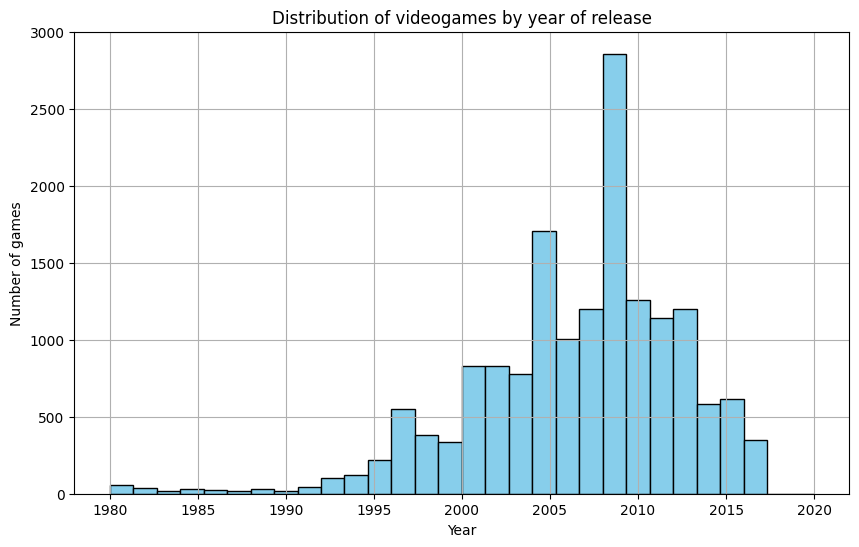

In [ ]:
gamesByYear(df)

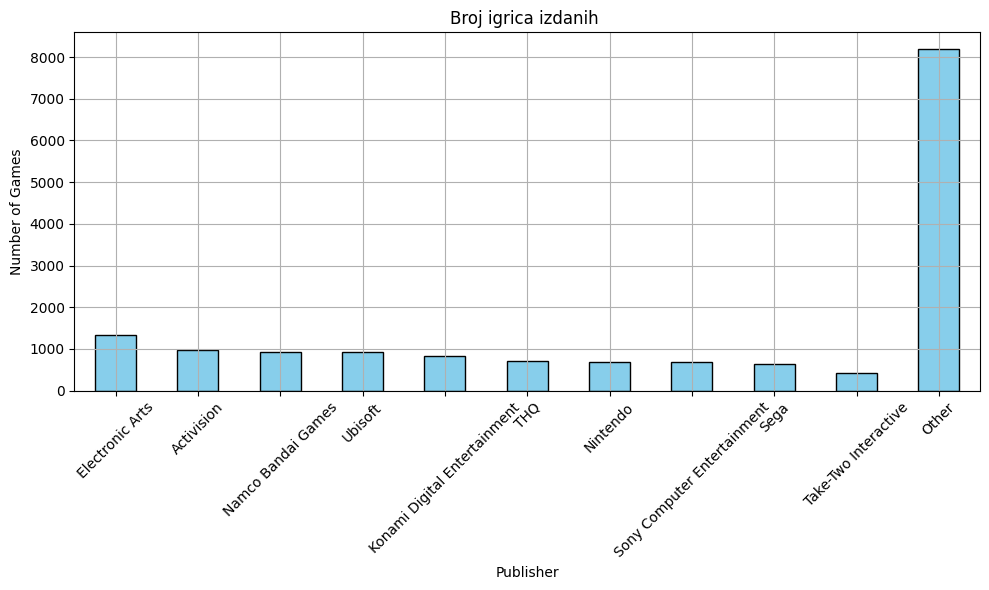

In [13]:
gamesByPublisher(df)

<ipython-input-18-8bde50b5b7cf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append(other_row, ignore_index=True)


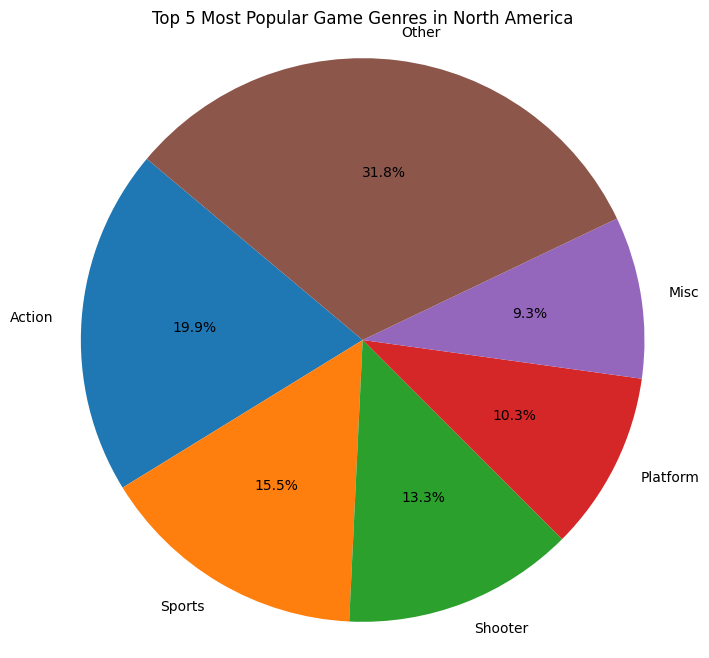

In [19]:
genresNA(df)

<ipython-input-20-496ee1aa2407>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append(other_row, ignore_index=True)


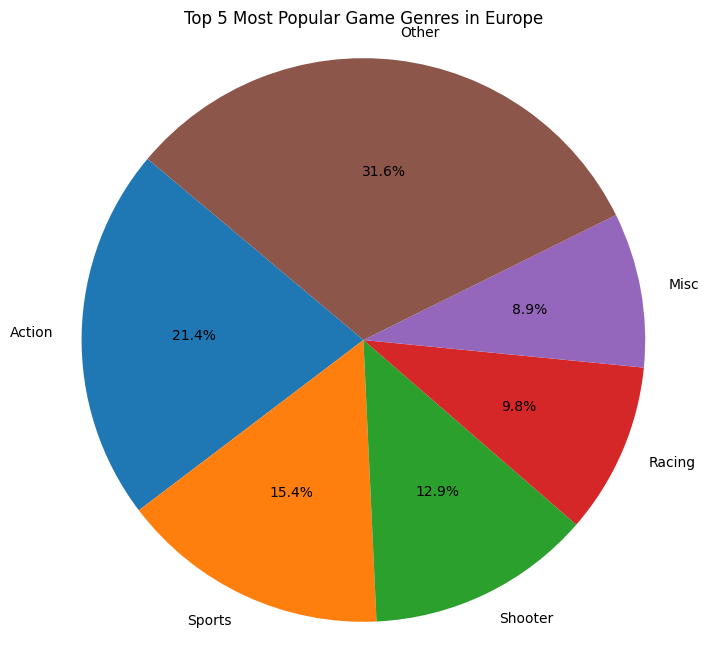

In [21]:
genresEU(df)

<ipython-input-22-86e49f0ecd99>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append(other_row, ignore_index=True)


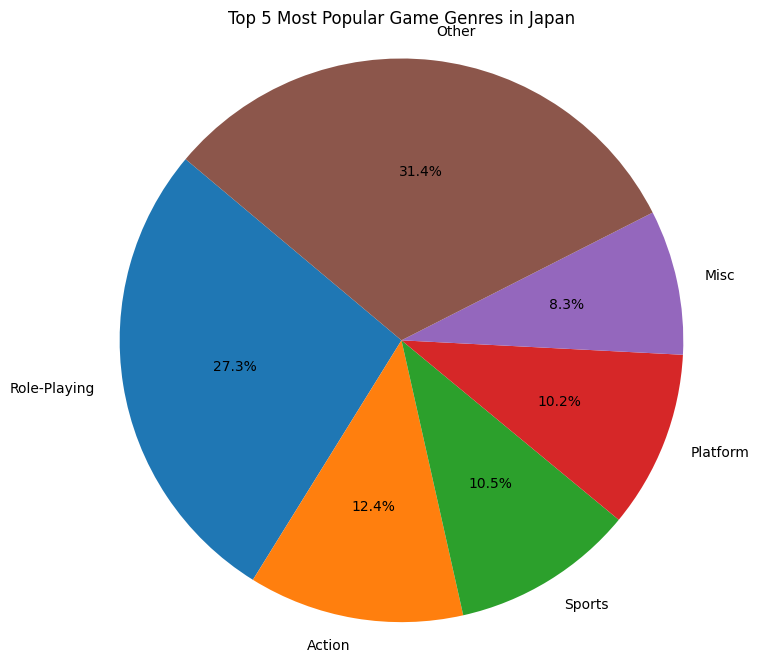

In [23]:
genresJP(df)

<ipython-input-24-e6eb1ebab1be>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append(other_row, ignore_index=True)


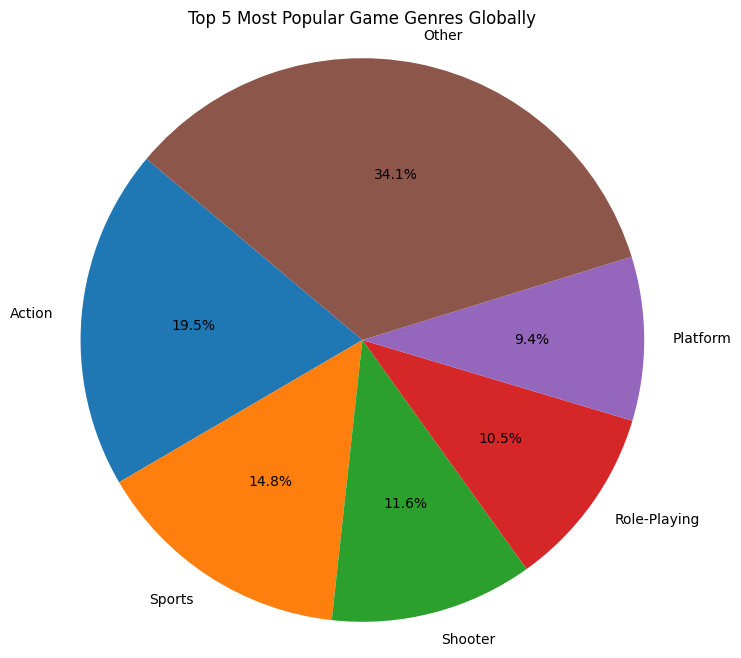

In [25]:
genresGlobal(df)

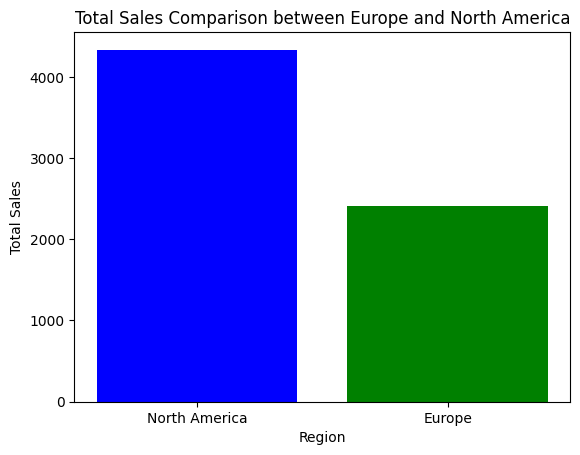

In [27]:
NAvsEUSales(df)

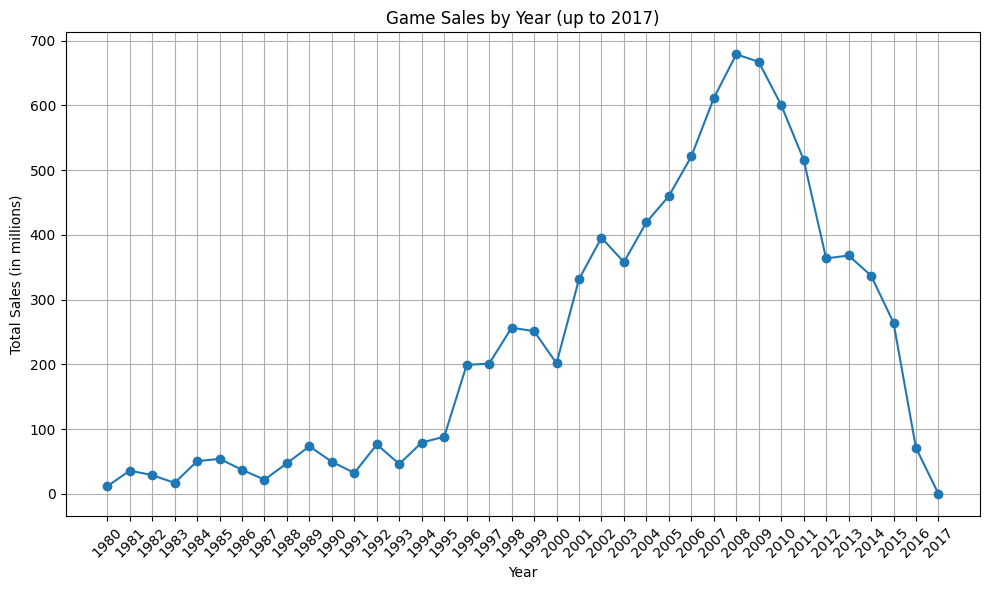

In [31]:
globalSalesByYear(df)